In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import plotly.express as px


plt.style.use("ggplot")
warnings.filterwarnings("ignore")

In [38]:
ruta="D:\\J\\Big data\\DATAHACK\\PYTHON\\006-_Caso_segmentacion\FMCG\\"
ruta_linux='/home/user/Datahack/Datos_Segmentacion/'
archivo="segmentation data.csv"

In [39]:
#df=pd.read_csv(ruta+archivo,sep=",")
df=pd.read_csv(ruta_linux+archivo,sep=",")

In [40]:
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


Pretratamiento

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [42]:
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


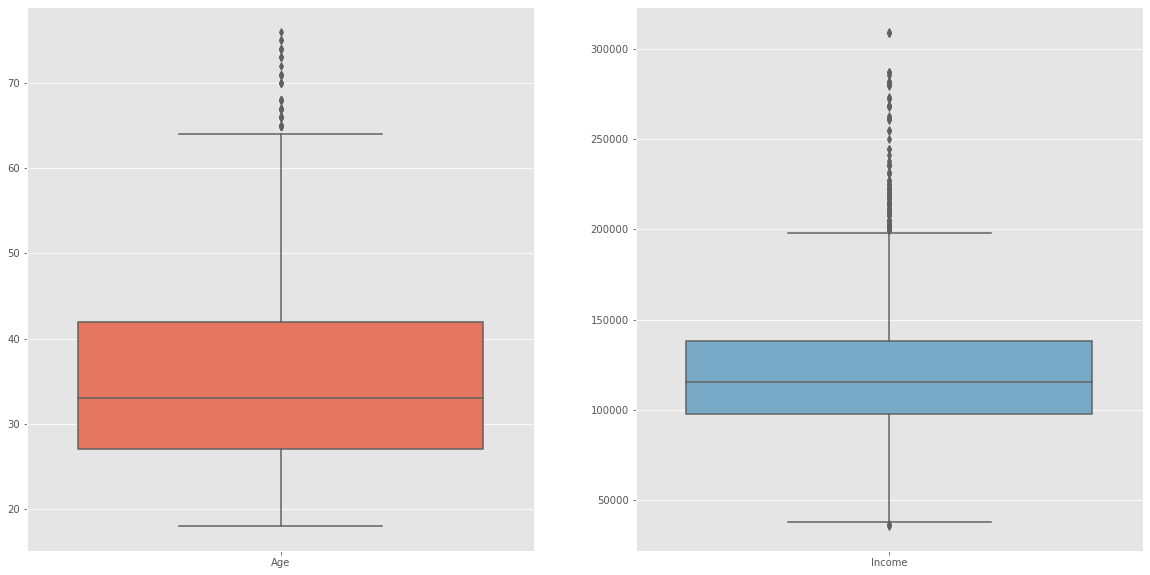

In [43]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,10))
sns.boxplot(data=df[["Age"]],ax=axes[0],palette='Reds')
sns.boxplot(data=df[["Income"]],ax=axes[1],palette='Blues');

Prueba 1: mantenemos como numéricas la edad y los ingresos y el resto como categóricas.

Pâra las categóricas onehot, para las numéricas, standard scaler

In [44]:
numericas=["Age","Income"]
Ids=["ID"]
categoricas=[s for s in df.columns if (s not in numericas) and (s not in Ids)]

In [45]:

categoricas

['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']

In [46]:
from sklearn.preprocessing import OneHotEncoder

In [47]:
encoder=OneHotEncoder(handle_unknown='ignore')

In [48]:
encoder.fit(df[categoricas])

OneHotEncoder(handle_unknown='ignore')

In [49]:
encoder.transform(df[categoricas]).toarray()

array([[1., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 1., 0., 0.],
       ...,
       [1., 0., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.]])

In [50]:
for col in categoricas:
    print(df[col].value_counts())

0    1086
1     914
Name: Sex, dtype: int64
0    1007
1     993
Name: Marital status, dtype: int64
1    1386
2     291
0     287
3      36
Name: Education, dtype: int64
1    1113
0     633
2     254
Name: Occupation, dtype: int64
0    989
1    544
2    467
Name: Settlement size, dtype: int64


Vamos a convertir las columnas Education, Occupation y Settlement
Education:

- 0	other / unknown
- 1	high school
- 2	university
- 3	graduate school- 

In [51]:
df_education=pd.get_dummies(df["Education"])
df_education.head()

,0,1,2,3
0,0,0,1,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


Eliminamos la primera columna porque es redudante. No se necesita. Está directamente correlacionada con las anteriores. Podríamos haber eliminado cualquiera, pero al estar contenidos los desconocidos en la 0, mejor nos quedamos con las 3 que sí conocemos

In [52]:
df_education.drop(columns=[0],inplace=True)
df_education.columns=["high_school","university","graduate_school"]
df_education.head()

,high_school,university,graduate_school
0,0,1,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


Ahora repetimos con Occupation:

-  0	unemployed / unskilled
-  1	skilled employee / official
-  2	management / self-employed / highly qualified employee / officer


Como en el caso anterior, vamos a mantener las columnas 1 y 2:

In [53]:
df_occupation=pd.get_dummies(df["Occupation"])
df_occupation.drop(columns=[0],inplace=True)
df_occupation.columns=["skilled_employee","management"]
df_occupation.head()


,skilled_employee,management
0,1,0
1,1,0
2,0,0
3,1,0
4,1,0


Finalmente tomamos la variable Settlement size:

- 0	small city
- 1	mid-sized city
- 2	big city


En este caso eliminaremos la big city

In [54]:
df_settlement=pd.get_dummies(df["Settlement size"])
df_settlement.drop(columns=[2],inplace=True)
df_settlement.columns=["small_city","mid_sized_city"]
df_settlement.head()

,small_city,mid_sized_city
0,0,0
1,0,0
2,1,0
3,0,1
4,0,1


Tras tratar las categóricas vamos a escalar las numéricas. En este caso solo hay dos numéricas: age e income. El motivo de escalar las variables numéricas es que, al utilizar kmeans que se basa en distancias, es importante que todas las varibles estén dentro del mismo rango de valores- Si una variable como income se mueve en el rango de decenas de miles y la edad solamente en miles, a la hora de considerar distancias entre puntos, esta diferencia de escala va a tener efectos poco deseables.

Para escalar los datos vamos a convertir estas variables en normales de media 0 y varianza 1.Esto se consigue sin más que restar la media a cada dato y dividir por la desviación típica. Sin embargo, sklearn lo hace ya directamente por nostros con Standard Scaler:

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
escalador=StandardScaler()

In [57]:
escalador.fit(df[numericas])

StandardScaler()

In [58]:
array_num=escalador.transform(df[numericas])
array_num

array([[ 2.65361447,  0.09752361],
       [-1.18713209,  0.78265438],
       [ 1.11731585, -0.83320224],
       ...,
       [-0.41898277, -0.90695688],
       [-1.01643224, -0.60332923],
       [-0.93108232, -1.3789866 ]])

De nuevo sklearn dentro de su filosofía de encadenar procesos en pipelines nos devuelve un array y no un dataframe. En este caso, vamos a convertirlo en dataframe ccon los nombres de las columnas correspondientes: ['Age_esc', 'Income_esc']

In [59]:
df_num=pd.DataFrame(array_num,columns=['Age_esc', 'Income_esc'])
df_num.head()

,Age_esc,Income_esc
0,2.653614,0.097524
1,-1.187132,0.782654
2,1.117316,-0.833202
3,0.775916,1.328386
4,1.458716,0.736932


Veamos ahora si, en efecto, se ajustan a una normal 0,1 como esperábamos:

In [60]:
df_num.describe()

,Age_esc,Income_esc
count,2.000000e+03,2.000000e+03
mean,1.180722e-16,6.605827e-17
std,1.000250e+00,1.000250e+00
min,-1.528532e+00,-2.234225e+00
25%,-7.603825e-01,-6.113281e-01
50%,-2.482829e-01,-1.418903e-01
75%,5.198664e-01,4.492952e-01
max,3.421764e+00,4.945225e+00


Veamos el gráfico escalado:

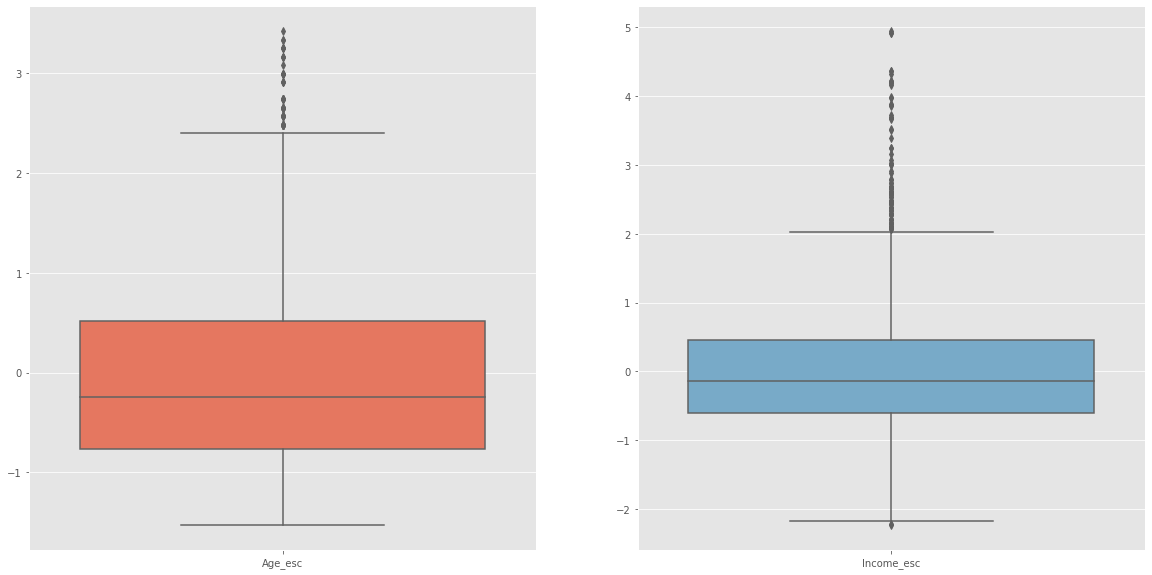

In [61]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,10))
sns.boxplot(data=df_num[["Age_esc"]],ax=axes[0],palette='Reds')
sns.boxplot(data=df_num[["Income_esc"]],ax=axes[1],palette='Blues');

Se aprecia cómo los valores están entre -2 y 5. Todos los valores son órdenes de magnitud similares.

En resumen, tenemos:

- El df original del que querremos recuperar el ID, el sexo y el estado civil;
- Un df con las variables numéricas escaladas (df_num)
- Tres dfs adicionales con el "encoding" de las categóricas: df_settlement,df_occupation y df_education

Solo queda fusionar los distintos dfs en uno solo y entrenar nuestro algoritmo. Veamos cómo hacerlo:

In [62]:
### PASO 1: CREAMOS UN DF A PARTIR DEL ORIGINAL SOLO CON LA VARIABLES ID SEX Y MARITAL STATUS.

df_parcial=df[["ID","Sex","Marital status"]]

In [63]:
### PASO 2: CREAMOS UNA LISTA CON LOS DFS A FUSIONAR:

lista_dfs=[df_parcial, df_num, df_settlement,df_occupation,df_education ]

In [64]:
###PASO 3: CREAMOS UN DF DE NOMBRE df_train CON pd.concat y axis =1, ya que vamos a añadir por columnas

In [65]:
df_train=pd.concat(lista_dfs,axis=1)
df_train.head()

,ID,Sex,Marital status,Age_esc,Income_esc,small_city,mid_sized_city,skilled_employee,management,high_school,university,graduate_school
0,100000001,0,0,2.653614,0.097524,0,0,1,0,0,1,0
1,100000002,1,1,-1.187132,0.782654,0,0,1,0,1,0,0
2,100000003,0,0,1.117316,-0.833202,1,0,0,0,1,0,0
3,100000004,0,0,0.775916,1.328386,0,1,1,0,1,0,0
4,100000005,0,0,1.458716,0.736932,0,1,1,0,1,0,0


De cara al entrenamiento, tenemos que quitar el ID. No se pueden utilizar indicadores para los algoritmos de machine learning. No obstante, no queremos perderlo, así que lo convertimos en índice:

In [66]:

df_train.index=df_train["ID"]
df_train.drop(columns=["ID"],inplace=True)
df_train.head()

,Sex,Marital status,Age_esc,Income_esc,small_city,mid_sized_city,skilled_employee,management,high_school,university,graduate_school
ID,,,,,,,,,,,
100000001,0,0,2.653614,0.097524,0,0,1,0,0,1,0
100000002,1,1,-1.187132,0.782654,0,0,1,0,1,0,0
100000003,0,0,1.117316,-0.833202,1,0,0,0,1,0,0
100000004,0,0,0.775916,1.328386,0,1,1,0,1,0,0
100000005,0,0,1.458716,0.736932,0,1,1,0,1,0,0


Y ya estamos listos para entrenar.

## ENTRENAMIENTO ALGORITMO KMEANS.

Para el algoritmo del KMEANS, se necesita especificar el número de clústeres con el que queremos quedarnos. Es lo que se conoce como clúster no jerárquico.

En primer lugar, vamos a aprender a entrenar un kmeans con 4 clústeres. Después veremos cómo se puede intentar ver cuál es el mejor número posible de clústeres.

In [67]:
### PASO 1: IMPORTAR LA CLASE KMEANS DE SKLEARN

from sklearn.cluster import KMeans

In [68]:
### PASO 2: CREAMOS UNA INSTANCIA DE KMEANS FIJANDO EL NÚMERO DE CLÚSTERES Y EL PARÁMETRO RANDOM STATE

modelo_cluster=KMeans(n_clusters=4,random_state=42)

Uno de los aspectos exigidos en machine learning es la replicabilidad de resultados, es decir, que si se repite la ejecución, se obtengan los mismos resultados. En muchos algoritmos como el kmeans, se inicializan ciertos parámetros aleatoriamente y el parámetro random_state trata precisamente de que en diferentes inicializaciones, estos parámetros no varíen.

In [69]:
### PASO 3: ENTRENAMOS EL MODELO CONTRA NUESTRO DATASET

modelo_cluster.fit(df_train)

KMeans(n_clusters=4, random_state=42)

TRas entrenar el modelo podemos intentar ver distintas propiedades del algoritmo:

- Centroides: son el centro de gravedad de cada uno de los 4 clústeres que se han formado. Los sucesivos clientes se identificarán con uno u otro clúster de acuerdo con el cdg que esté más cerca.

- Inercia: Se entiende por inercia la suma de las distancias entre los puntos a los centroides. En la documentación de sklearn se indica la expresión:


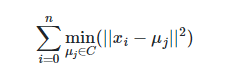

En este caso, el mínimo indica que lo que se intenta es minimizar esas distancias. Este valor es importante porque es la base para el llamado método del codo que comentaremos seguidamente. De momento, veamos cómo extraer el clúster al que pertenece cada muestra, los centroides y la inercia

In [70]:
### PASO 4: Hacemos una prediccion:

modelo_cluster.predict(df_train)

array([3, 0, 2, ..., 2, 2, 2], dtype=int32)

Vemos como nos devuelve un array de numpy. Lo podemos anadir directamente como columna:

In [71]:
df_train['cluster']=modelo_cluster.predict(df_train)
df_train.head()

,Sex,Marital status,Age_esc,Income_esc,small_city,mid_sized_city,skilled_employee,management,high_school,university,graduate_school,cluster
ID,,,,,,,,,,,,
100000001,0,0,2.653614,0.097524,0,0,1,0,0,1,0,3
100000002,1,1,-1.187132,0.782654,0,0,1,0,1,0,0,0
100000003,0,0,1.117316,-0.833202,1,0,0,0,1,0,0,2
100000004,0,0,0.775916,1.328386,0,1,1,0,1,0,0,1
100000005,0,0,1.458716,0.736932,0,1,1,0,1,0,0,3


Hechas las predicciones podemos consultar los centroides:

In [72]:
modelo_cluster.cluster_centers_

array([[ 4.86581097e-01,  5.63593932e-01, -5.06623303e-01,
        -1.05956749e-01,  3.92065344e-01,  3.44224037e-01,
         9.56826138e-01,  1.51691949e-02,  8.06301050e-01,
         4.66744457e-03,  5.83430572e-03],
       [ 1.85714286e-01,  3.35714286e-01,  1.21769955e-01,
         1.58359718e+00,  6.78571429e-02,  4.14285714e-01,
         2.64285714e-01,  7.00000000e-01,  6.92857143e-01,
         1.32142857e-01,  2.14285714e-02],
       [ 5.86826347e-01,  4.91017964e-01, -3.70600782e-01,
        -9.73491449e-01,  9.84031936e-01,  3.99201597e-03,
         2.22044605e-16,  9.98003992e-03,  7.90419162e-01,
         3.59281437e-02,  6.93889390e-18],
       [ 4.17127072e-01,  4.69613260e-01,  1.61809827e+00,
         3.73251215e-01,  3.89502762e-01,  3.61878453e-01,
         6.04972376e-01,  1.10497238e-01,  2.90055249e-01,
         6.40883978e-01,  6.90607735e-02]])

Cada uno de estos arrays es el centroide de cada uno de los clusteres. Podemos crear un dataframe con ellos para guardarlos:

In [74]:
df_centroides=pd.DataFrame(modelo_cluster.cluster_centers_,columns=[x for x in df_train.columns if x !='cluster'],index=['cluster %s' %x for x in range(0,4)])
df_centroides.head()

,Sex,Marital status,Age_esc,Income_esc,small_city,mid_sized_city,skilled_employee,management,high_school,university,graduate_school
cluster 0,0.486581,0.563594,-0.506623,-0.105957,0.392065,0.344224,9.568261e-01,0.015169,0.806301,0.004667,5.834306e-03
cluster 1,0.185714,0.335714,0.121770,1.583597,0.067857,0.414286,2.642857e-01,0.700000,0.692857,0.132143,2.142857e-02
cluster 2,0.586826,0.491018,-0.370601,-0.973491,0.984032,0.003992,2.220446e-16,0.009980,0.790419,0.035928,6.938894e-18
cluster 3,0.417127,0.469613,1.618098,0.373251,0.389503,0.361878,6.049724e-01,0.110497,0.290055,0.640884,6.906077e-02


Se ve como las coordenadas del centroide no se corresponden en las categoricas con los valores de 0 o 1 esperados. Este es uno de los problemas que nos vamos a encontrar al utilizar kmeans: los centroides no son puntos del cluster y no tienen por que tomar los valores de las categoricas esperados, sino cualquier valor entre 0 y 1. 

Existen variaciones sobre el kmeans como es el kmedians que en lugar de tomar el centro de gravedad y la media se basa en la mediana. Tiene la ventaja de que los centroides si son puntos del cluster y, sobre todo, es mas robusto frente a outliers.

Veamos la inercia:

In [75]:
modelo_cluster.inertia_

3950.023063617401

Este es un valor que dice poco. La inercia va a ir disminuyendo a medida que se aumente el numero de clusters. Esto es facil de entender, pues en el limite, es decir, con tantos clusteres como muestras, la inercia final sera nula, ya que cada punto coincidira con su propio centroide. Esto, naturalmente, no es operativo y se requiere definir algun metodo de cara a limitar ese descenso de la inercia. 



## METODO DEL CODO: ELECCI'ON DEL NUMERO DE CLUSTERES

El metodo del codo es el primer metodo y el mas sencillo y habitual de los que vamos a ver para determinar elnumero de clusteres.

En realidad, no proporciona un numero como tal, sino que se grafica una curva de la inercia frente al numero de clusteres y se escoge el n'umero obsrevando cuando el aumento en un cluster no implica una bajada significativa de la inercia. Esto se ve como un codo en la curva y de ahi el nombre del metodo.


La funcion siguiente permite pintar el metodo del codo:

In [79]:
def elbow_plot(df2_k, columns_to_k, range_n_clusters=[2, 3, 4, 5, 6, 7, 8, 9, 10], fig_size=(15, 8)):
    """
    A function to plot the elbow.inertia plot for clustering,
    Args: a dataframe, list with columns of the independent variables to cluster, a list with the number of cluters to compare
    and the figsize.
    Returns. A plot of the elbow function
    """

    sse = {}
    plt.figure(figsize=fig_size)
    for k in range_n_clusters:
        kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df2_k[columns_to_k])

        # df2_kmeans["clusters"] = kmeans.labels_

        # print(df2_kmeans["clusters"])

        sse[k] = kmeans.inertia_  # Inertia: Sum of distances of samples to their closest cluster center

    # plt.figure()

    df_I = pd.DataFrame.from_dict(sse, orient='index', columns=["Inertia"]).reset_index()
    df_I.columns = ["Number of clusters", "Inertia"]

    df_I.sort_values(by="Inertia", ascending=False, inplace=True)

    fig = px.line(df_I, y="Inertia", x="Number of clusters", title='Optimal number of clusters')
    fig.show()


In [83]:
#### Tenemos que quitar la columna cluster que hemos anadido antes:
try:
    df_train.drop(columns='cluster',inplace=True)
except:
    pass

elbow_plot(df_train,columns_to_k=df_train.columns,range_n_clusters=np.arange(2,21));
pass

<Figure size 1080x576 with 0 Axes>

Este es un muy buen ejemplo de los defectos del m'etodo del codo. No se ve un codo claro, sino que la curva es bastante suave. En apariencia, parece que con 5 clusters primero y con 10 despues hay cierta inflexion, pero no esta muy claro

## ALTERNATIVA: METODO DEL SILHOUETTE (SOFT CLUSTERING)

El metodo del silhouette calcula para cada muestra un valor entre -1 y 1. Valores positivos signfican que la muestra esta bien clasificada dentro de su cluster y negativos que no lo esta, es decir, podria pertenecer a otro cluster perfectamente.

El metodo del silhouette calcula para cada muestra la media de la distancia intracluster (a), es decir, contra todas las muestras de su cluster y la extra cluster contra el cluster mas cercano (b). Despues, se divide entre la mayor de ellas y se obtiene el valor:

coeficiente=(b-a)/max(b,a)

si a, distancia intracluster es mayor, el coeficiente dara negativo. Este metodo tiene dos grandes ventajas:

- Permite dar un grado de clasificacion de cada muestra, es decir, podemos saber que muestras estan mejor clasificadas que otras (soft clustering);
- Obtiene un valor para cada cluster como la media del silhouette de cada cluster y un valor para el total, con lo que se pueden comparar directamente los clusteres que se formen.

Sin embargo, tiene una gran desventaja. Para poder calcular las distancias entre las diferentes muestras, se tiene que calcular la matriz de distancias. Esta es una matriz simetrica que contiene las distancias de cada muestra contra todas las demas. Este proceso requiere mucho tiempo de computacion y, a medida que el numero de muestras crece, se hace inviable por temas de tiempo de computo y tambien de memoria.

No obstante, siempre que sea factible su calculo se recomienda. Veamos como se puede hacer.




In [84]:
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score

Veamos para el caso de 4 clusteres que valor se obtiene